In [1]:
import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'xgboost'

In [1]:
from flask.json import jsonify
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
import matplotlib.pyplot as plt

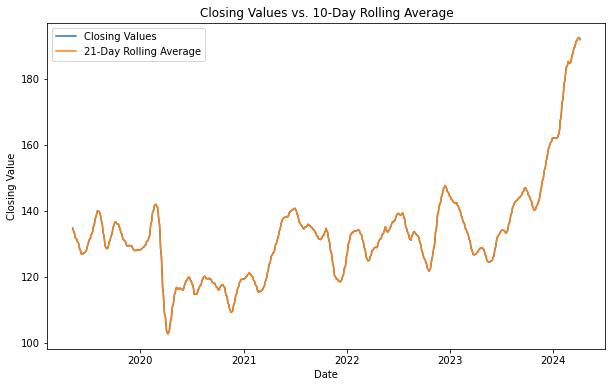

In [88]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
df = pd.read_csv("ticker_data.csv")

# Set the "date" column as the index
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)


df_close = df["close"]

# Calculate the rolling average for every 10 days
rolling_avg = df_close.rolling(window=10).mean()
# 30 days
rolling_avg_21 = df_close.rolling(window=21).mean()
df_close =  df_close.rolling(window=21).mean()


plt.figure(figsize=(10, 6))
plt.plot(df_close.index, df_close, label='Closing Values')
# plt.plot(rolling_avg.index, rolling_avg, label='10-Day Rolling Average' ,color ="purple")
plt.plot(rolling_avg_21.index, rolling_avg_21, label='21-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Closing Value')
plt.title('Closing Values vs. 10-Day Rolling Average')
plt.legend()
plt.show()


In [30]:
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(df_close) * .95 ))

training_data_len

1196

In [36]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler


df_close_values = df_close.values

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(df_close_values.reshape(-1, 1))

scaled_data

array([[       nan],
       [       nan],
       [       nan],
       ...,
       [0.99885586],
       [0.99673178],
       [0.99301333]])

In [100]:
# Create the training data set 
# Create the scaled training data set
train_data = scaled_data[~np.isnan(scaled_data[:, 0])][:training_data_len]  # Exclude NaN values

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(21, len(train_data)):
    x_train.append(train_data[i-21:i, 0])
    y_train.append(train_data[i, 0])
    # if i<= 61:


# print(y_train)
        
        
# Convert the x_train and y_train to numpy arrays 
x_train, y_train = np.array(x_train), np.array(y_train)
print(y_train.shape,x_train.shape )

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
print(y_train.shape,x_train.shape )
print(y_train,x_train )

(1175,) (1175, 21)
(1175,) (1175, 21, 1)
[0.27183931 0.26946628 0.26915906 ... 0.76807318 0.78168104 0.79363095] [[[0.3570407 ]
  [0.35431277]
  [0.35088565]
  ...
  [0.28291523]
  [0.27908554]
  [0.27458313]]

 [[0.35431277]
  [0.35088565]
  [0.3469871 ]
  ...
  [0.27908554]
  [0.27458313]
  [0.27183931]]

 [[0.35088565]
  [0.3469871 ]
  [0.34072611]
  ...
  [0.27458313]
  [0.27183931]
  [0.26946628]]

 ...

 [[0.66171579]
  [0.66147742]
  [0.6613503 ]
  ...
  [0.73119054]
  [0.74396678]
  [0.75461894]]

 [[0.66147742]
  [0.6613503 ]
  [0.66016908]
  ...
  [0.74396678]
  [0.75461894]
  [0.76807318]]

 [[0.6613503 ]
  [0.66016908]
  [0.66062462]
  ...
  [0.75461894]
  [0.76807318]
  [0.78168104]]]


In [101]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\Users\mabro\anaconda3\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1175/1175 ━━━━━━━━━━━━━━━━━━━━ 26s 20ms/step - loss: 0.0024


In [102]:

test_data = scaled_data[training_data_len - 21: , :]


print(test_data)



# Create the data sets x_test and y_test
x_test = []
y_test = df_close_values[training_data_len:]
for i in range(21, len(test_data)):
    x_test.append(test_data[i-21:i, 0])
    
# Convert the data to a numpy array
x_test = np.array(x_test)
# print(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
# print(test_data)
# Get the models predicted price values 
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# print(predictions)
# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
# rmse

[[0.57293896]
 [0.57897218]
 [0.58635083]
 [0.59529737]
 [0.60360828]
 [0.61182914]
 [0.61845033]
 [0.62356188]
 [0.62868932]
 [0.63328178]
 [0.63630104]
 [0.63994004]
 [0.6436532 ]
 [0.64790665]
 [0.65208594]
 [0.65637646]
 [0.66015848]
 [0.66171579]
 [0.66147742]
 [0.6613503 ]
 [0.66016908]
 [0.66062462]
 [0.66055046]
 [0.66016378]
 [0.65944869]
 [0.66002606]
 [0.66179524]
 [0.66347437]
 [0.66591627]
 [0.6705458 ]
 [0.67651546]
 [0.68387292]
 [0.6908384 ]
 [0.70582346]
 [0.71864737]
 [0.73119054]
 [0.74396678]
 [0.75461894]
 [0.76807318]
 [0.78168104]
 [0.79363095]
 [0.80647605]
 [0.81844715]
 [0.83130813]
 [0.84460877]
 [0.85732144]
 [0.86680297]
 [0.8756012 ]
 [0.88661356]
 [0.89763121]
 [0.90396635]
 [0.90760536]
 [0.91304532]
 [0.91929042]
 [0.91595334]
 [0.91460262]
 [0.91362798]
 [0.91212365]
 [0.91452847]
 [0.91779139]
 [0.9210543 ]
 [0.92780261]
 [0.93475751]
 [0.94122508]
 [0.94512893]
 [0.95118863]
 [0.95677162]
 [0.96192555]
 [0.96589826]
 [0.96845138]
 [0.97147064]
 [0.97

C:\Users\mabro\AppData\Local\Temp\ipykernel_7768\3182095140.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


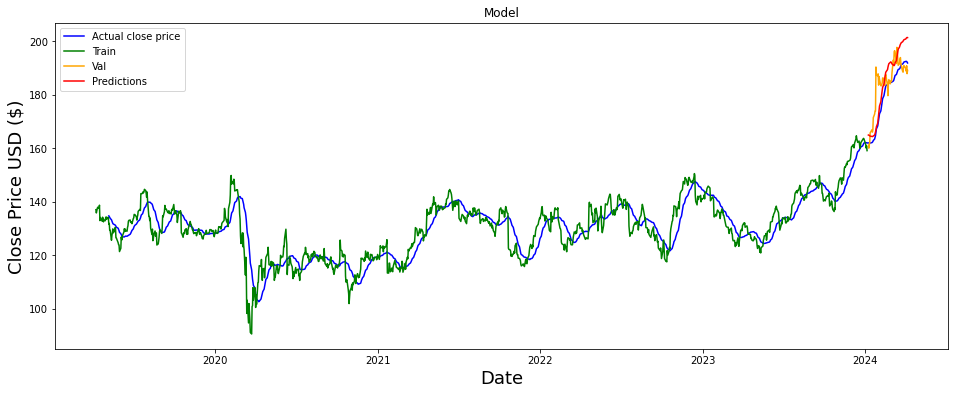

In [105]:
# Plot the data
train = df[:training_data_len]
valid = df[training_data_len:]

valid['Predictions'] = predictions
valid
predictions_df = pd.DataFrame(predictions, index=valid.index, columns=['Predictions'])

# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(df_close,color='blue', label="Actual close price")
plt.plot(train['close'], label="Train",color='green')
plt.plot(valid['close'],label="Val", color='orange',)
plt.plot(valid['Predictions'],label="Predictions", color='red')
plt.legend(loc='upper left')
plt.show()

<AxesSubplot:xlabel='date'>

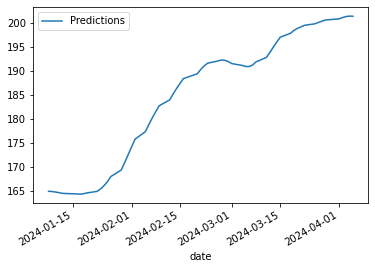

In [109]:
predictions_df.plot()